In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-05-07 20:22:52--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0s      

2024-05-07 20:22:53 (127 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
from sklearn.model_selection import train_test_split
dataset_encoded = pd.get_dummies(dataset, columns=['sex', 'smoker', 'region'])
dataset_encoded = dataset_encoded.astype(float)
train_dataset, test_dataset = train_test_split(dataset_encoded, test_size=0.2)
train_dataset.tail()
y_test_values = test_dataset.pop('expenses')
y_train_values = train_dataset.pop('expenses')


In [ ]:
linear_model = tf.keras.Sequential([
    layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(units=1, input_shape=[train_dataset.shape[1]])
])
linear_model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error', metrics = ['mae', 'mse'])


In [ ]:
linear_model.fit(train_dataset, y_train_values, epochs=100, verbose=1, validation_split = 0.2)

Epoch 1/100
27/27 [==============================] - 1s 8ms/step - loss: 10162.6963 - mae: 10162.6963 - mse: 234088080.0000 - val_loss: 8441.7021 - val_mae: 8441.7021 - val_mse: 137618592.0000
Epoch 2/100
27/27 [==============================] - 0s 2ms/step - loss: 7679.0732 - mae: 7679.0732 - mse: 158036496.0000 - val_loss: 7866.6470 - val_mae: 7866.6470 - val_mse: 143935424.0000
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 7258.5874 - mae: 7258.5874 - mse: 155554624.0000 - val_loss: 7438.6641 - val_mae: 7438.6641 - val_mse: 158284704.0000
Epoch 4/100
27/27 [==============================] - 0s 2ms/step - loss: 6895.0439 - mae: 6895.0439 - mse: 157298624.0000 - val_loss: 7097.1973 - val_mae: 7097.1973 - val_mse: 161750464.0000
Epoch 5/100
27/27 [==============================] - 0s 2ms/step - loss: 6535.9116 - mae: 6535.9116 - mse: 157559728.0000 - val_loss: 6931.7310 - val_mae: 6931.7310 - val_mse: 150643712.0000
Epoch 6/100
27/27 [========================

In [ ]:
model = linear_model
test_labels = y_test_values


9/9 - 0s - loss: 2306.9587 - mae: 2306.9587 - mse: 26910358.0000 - 27ms/epoch - 3ms/step
Testing set Mean Abs Error: 2306.96 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 1ms/step


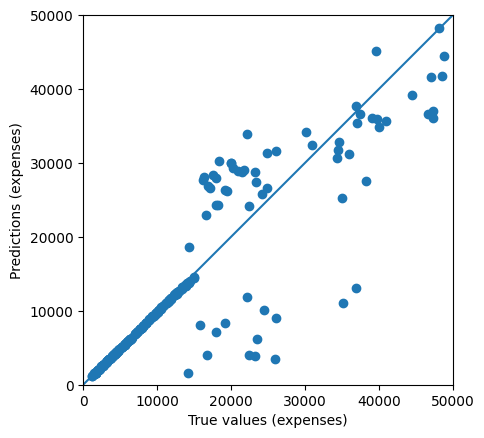

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
